In [ ]:
import pandas as pd

In [2]:
df = pd.read_excel('data/fabio.xlsx', sheet_name='consolidado', na_values='-')
df.head()

,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,NaN,3180.88,3213.33,3373.99,3795.74,3847.36,3942.39,4113.10,4113.10,4648.46,5154.68,5443.34,5688.29
1,NaN,2.0,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
2,Adalimumabe 40 mg,NaN,4987.64,5154.72,5412.45,6089.00,6171.80,6300.80,6573.63,0.00,2395.20,2656.03,2346.96,2452.57
3,NaN,1.0,1.00,1.00,1.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,3.00,4.00
4,Alfataliglicerase 200Ui,NaN,NaN,1372.50,1285.75,1446.47,1299.94,1327.10,1384.56,1384.56,1526.33,1692.55,1787.33,1867.76


Separar Preço e quantidade de empresas

In [3]:
df_reg = df[df['Princípio ativo'].isna()].reset_index(drop=True).copy()
df_valor = df[~df['Princípio ativo'].isna()].reset_index(drop=True).copy()
df_reg['Princípio ativo'] = df_valor['Princípio ativo']

In [4]:
df_reg.head()

,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
1,Adalimumabe 40 mg,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,3.0,4.0
2,Alfataliglicerase 200Ui,NaN,NaN,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Atazanavir 300 mg,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,Betainterferona 1A 22 mcg/ml,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [5]:
df_valor.head()

,Princípio ativo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acetato de Glatirâmer 20 mg/ml,NaN,3180.88,3213.33,3373.99,3795.74,3847.36,3942.39,4113.10,4113.10,4648.46,5154.68,5443.34,5688.29
1,Adalimumabe 40 mg,NaN,4987.64,5154.72,5412.45,6089.00,6171.80,6300.80,6573.63,0.00,2395.20,2656.03,2346.96,2452.57
2,Alfataliglicerase 200Ui,NaN,NaN,1372.50,1285.75,1446.47,1299.94,1327.10,1384.56,1384.56,1526.33,1692.55,1787.33,1867.76
3,Atazanavir 300 mg,851.57,874.56,883.48,463.83,248.06,251.43,256.68,267.79,267.79,295.21,327.36,345.69,361.25
4,Betainterferona 1A 22 mcg/ml,NaN,5934.30,5994.83,6294.57,7081.40,7177.71,7354.99,7673.45,2978.88,3283.90,3641.52,3845.45,4018.50


Consolidar

In [6]:
df_reg_long = df_reg.melt(id_vars='Princípio ativo', var_name='Ano', value_name='N')
df_reg_long.head()

,Princípio ativo,Ano,N
0,Acetato de Glatirâmer 20 mg/ml,2012,2.0
1,Adalimumabe 40 mg,2012,1.0
2,Alfataliglicerase 200Ui,2012,NaN
3,Atazanavir 300 mg,2012,1.0
4,Betainterferona 1A 22 mcg/ml,2012,1.0


In [7]:
df_valor_long = df_valor.melt(id_vars='Princípio ativo', var_name='Ano', value_name='Preço')
df_valor_long.head()

,Princípio ativo,Ano,Preço
0,Acetato de Glatirâmer 20 mg/ml,2012,NaN
1,Adalimumabe 40 mg,2012,NaN
2,Alfataliglicerase 200Ui,2012,NaN
3,Atazanavir 300 mg,2012,851.57
4,Betainterferona 1A 22 mcg/ml,2012,NaN


In [8]:
df_valor_long['N'] = df_reg_long['N'] 
df_consolidado = df_valor_long.sort_values(['Princípio ativo','Ano']).copy()
df_consolidado["Ano"] = df_consolidado["Ano"].astype(str).apply(lambda x: x[2:])
df_consolidado.fillna(0, inplace=True)
df_consolidado.head()

princio_ativo = df_consolidado['Princípio ativo'].unique()


Data referência registro sus



In [9]:
df_ano_base = pd.read_excel('data/fabio.xlsx', sheet_name='ano_reg_sus', na_values='-')
df_ano_base["Registro"] = df_ano_base["Registro"].astype(str).apply(lambda x: x[2:])
df_ano_base.head()




,Princípio ativo,Registro
0,Acetato de Glatirâmer 20 mg/ml,
1,Adalimumabe 40 mg,23
2,Alfataliglicerase 200Ui,14
3,Atazanavir 300 mg,14
4,Betainterferona 1A 22 mcg/ml e 44 mcg/ml,16


In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

sns.set_theme(style="ticks")

df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[:24])]


# Função para quebrar texto longo nos títulos
def wrap_title(title, width=20):
    return "\n".join(textwrap.wrap(title, width))


def unique_year(df):
    return sorted(df["Ano"].unique())
    

def year_index(df):
    # Obter os anos únicos e ordená-los
    anos_unicos = unique_year(df)
    ano_to_index = {ano: i for i, ano in enumerate(anos_unicos)}
    return ano_to_index

def add_base_line(df, title, year_to_index, ax):
    try:
        ano_ref = df[df['Princípio ativo'] == title]['Registro'].values[0]
    except IndexError:
        ano_ref = None
    
    if ano_ref in year_to_index:
        x_pos = year_to_index[ano_ref]  # Posição no eixo X
        ax.axvline(x=x_pos, linestyle=":", linewidth=1.8)
        
        # Adicionar anotação "SUS" um pouco acima do gráfico
        ax.text(x_pos + 0.1, ax.get_ylim()[1] * .05, "SUS", color="grey", fontsize=16, 
                ha="left", va="bottom", fontweight="bold")


class FacetChart:
    def __init__(self, df, col, hue, font_config, palette="tab20c", **kwargs):
        self.df = df
        self.col = col
        self.hue = hue
        self.font_config = font_config
        self.palette = palette
        self.kwargs = kwargs

        
    def _facet_grid(self):
        # Inicializar o FacetGrid
        grid = sns.FacetGrid(
            df, col=self.col, hue=self.hue, palette=self.palette, **self.kwargs
        )
        return grid
    
    @staticmethod
    def _create_additional_subplot(ax):
        # Criar um subplot adicional abaixo do gráfico atual
        divider = make_axes_locatable(ax)
        ax_sub = divider.append_axes("bottom", size="35%", pad=0.3)
        return ax_sub
    
    def _plot_margin(self, title, ax):
            ax_sub = self._create_additional_subplot(ax)
            
            # Mostrar rótulo a cada 1 ano
            distinc_year = unique_year(self.df)
            labels_show = [ano if i % 2 == 0 else '' for i, ano in enumerate(distinc_year)]
        
            df_filtered = self.df[self.df["Princípio ativo"] == title]
            sns.barplot(x=df_filtered["Ano"], y=df_filtered["N"], ax=ax_sub, color="#E4E4E5")
            ax_sub.set_xticks(range(len(distinc_year)))
            ax_sub.set_xticklabels(labels_show, fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.set_xlabel("Ano", fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.set_ylabel("Q.E", fontsize=self.font_config.get('fontsize') or 14)
            ax_sub.tick_params(axis="y", labelsize=self.font_config.get('fontsize') or 16)
        
    
    def subplots(self, save_file):
        grid = self._facet_grid()
        
        # Desenhar o gráfico de linha
        grid.map(plt.plot, "Ano", "Preço", marker="o")
        
        year_to_index = year_index(self.df)
        distinct_year = unique_year(self.df)
        
        # Aplicar títulos formatados e adicionar subplots
        for ax, title in zip(grid.axes.flat, grid.col_names):
            ax.set_title(wrap_title(title, width=40), fontsize= self.font_config.get('fontsize') or 16, fontweight="bold")  # Ajustar tamanho da fonte
            ax.set_xlabel("")
                    
            add_base_line(df_ano_base, title, year_to_index, ax)
            
            # Ajustar os rótulos do eixo X para os anos reais
            ax.set_xticks(range(len(distinct_year)))
            ax.set_xticklabels([])
            
            ax.set_ylim(0, None)
            ax.tick_params(axis="y", labelsize=self.font_config.get('fontsize') or 16)
            ax.set_ylabel('Preço', fontsize=self.font_config.get('fontsize') or 16)
                                    
            self._plot_margin(title, ax)

        # 🔹 Ajustes visuais finais
        grid.figure.subplots_adjust(hspace=1.5)  # Espaçamento entre subplots
        grid.figure.tight_layout(w_pad=1)  # Melhor disposição
        
        plt.show()
        
        if save_file:
            grid.savefig(f'{save_file}.jpeg', dpi=600)
        
        return grid

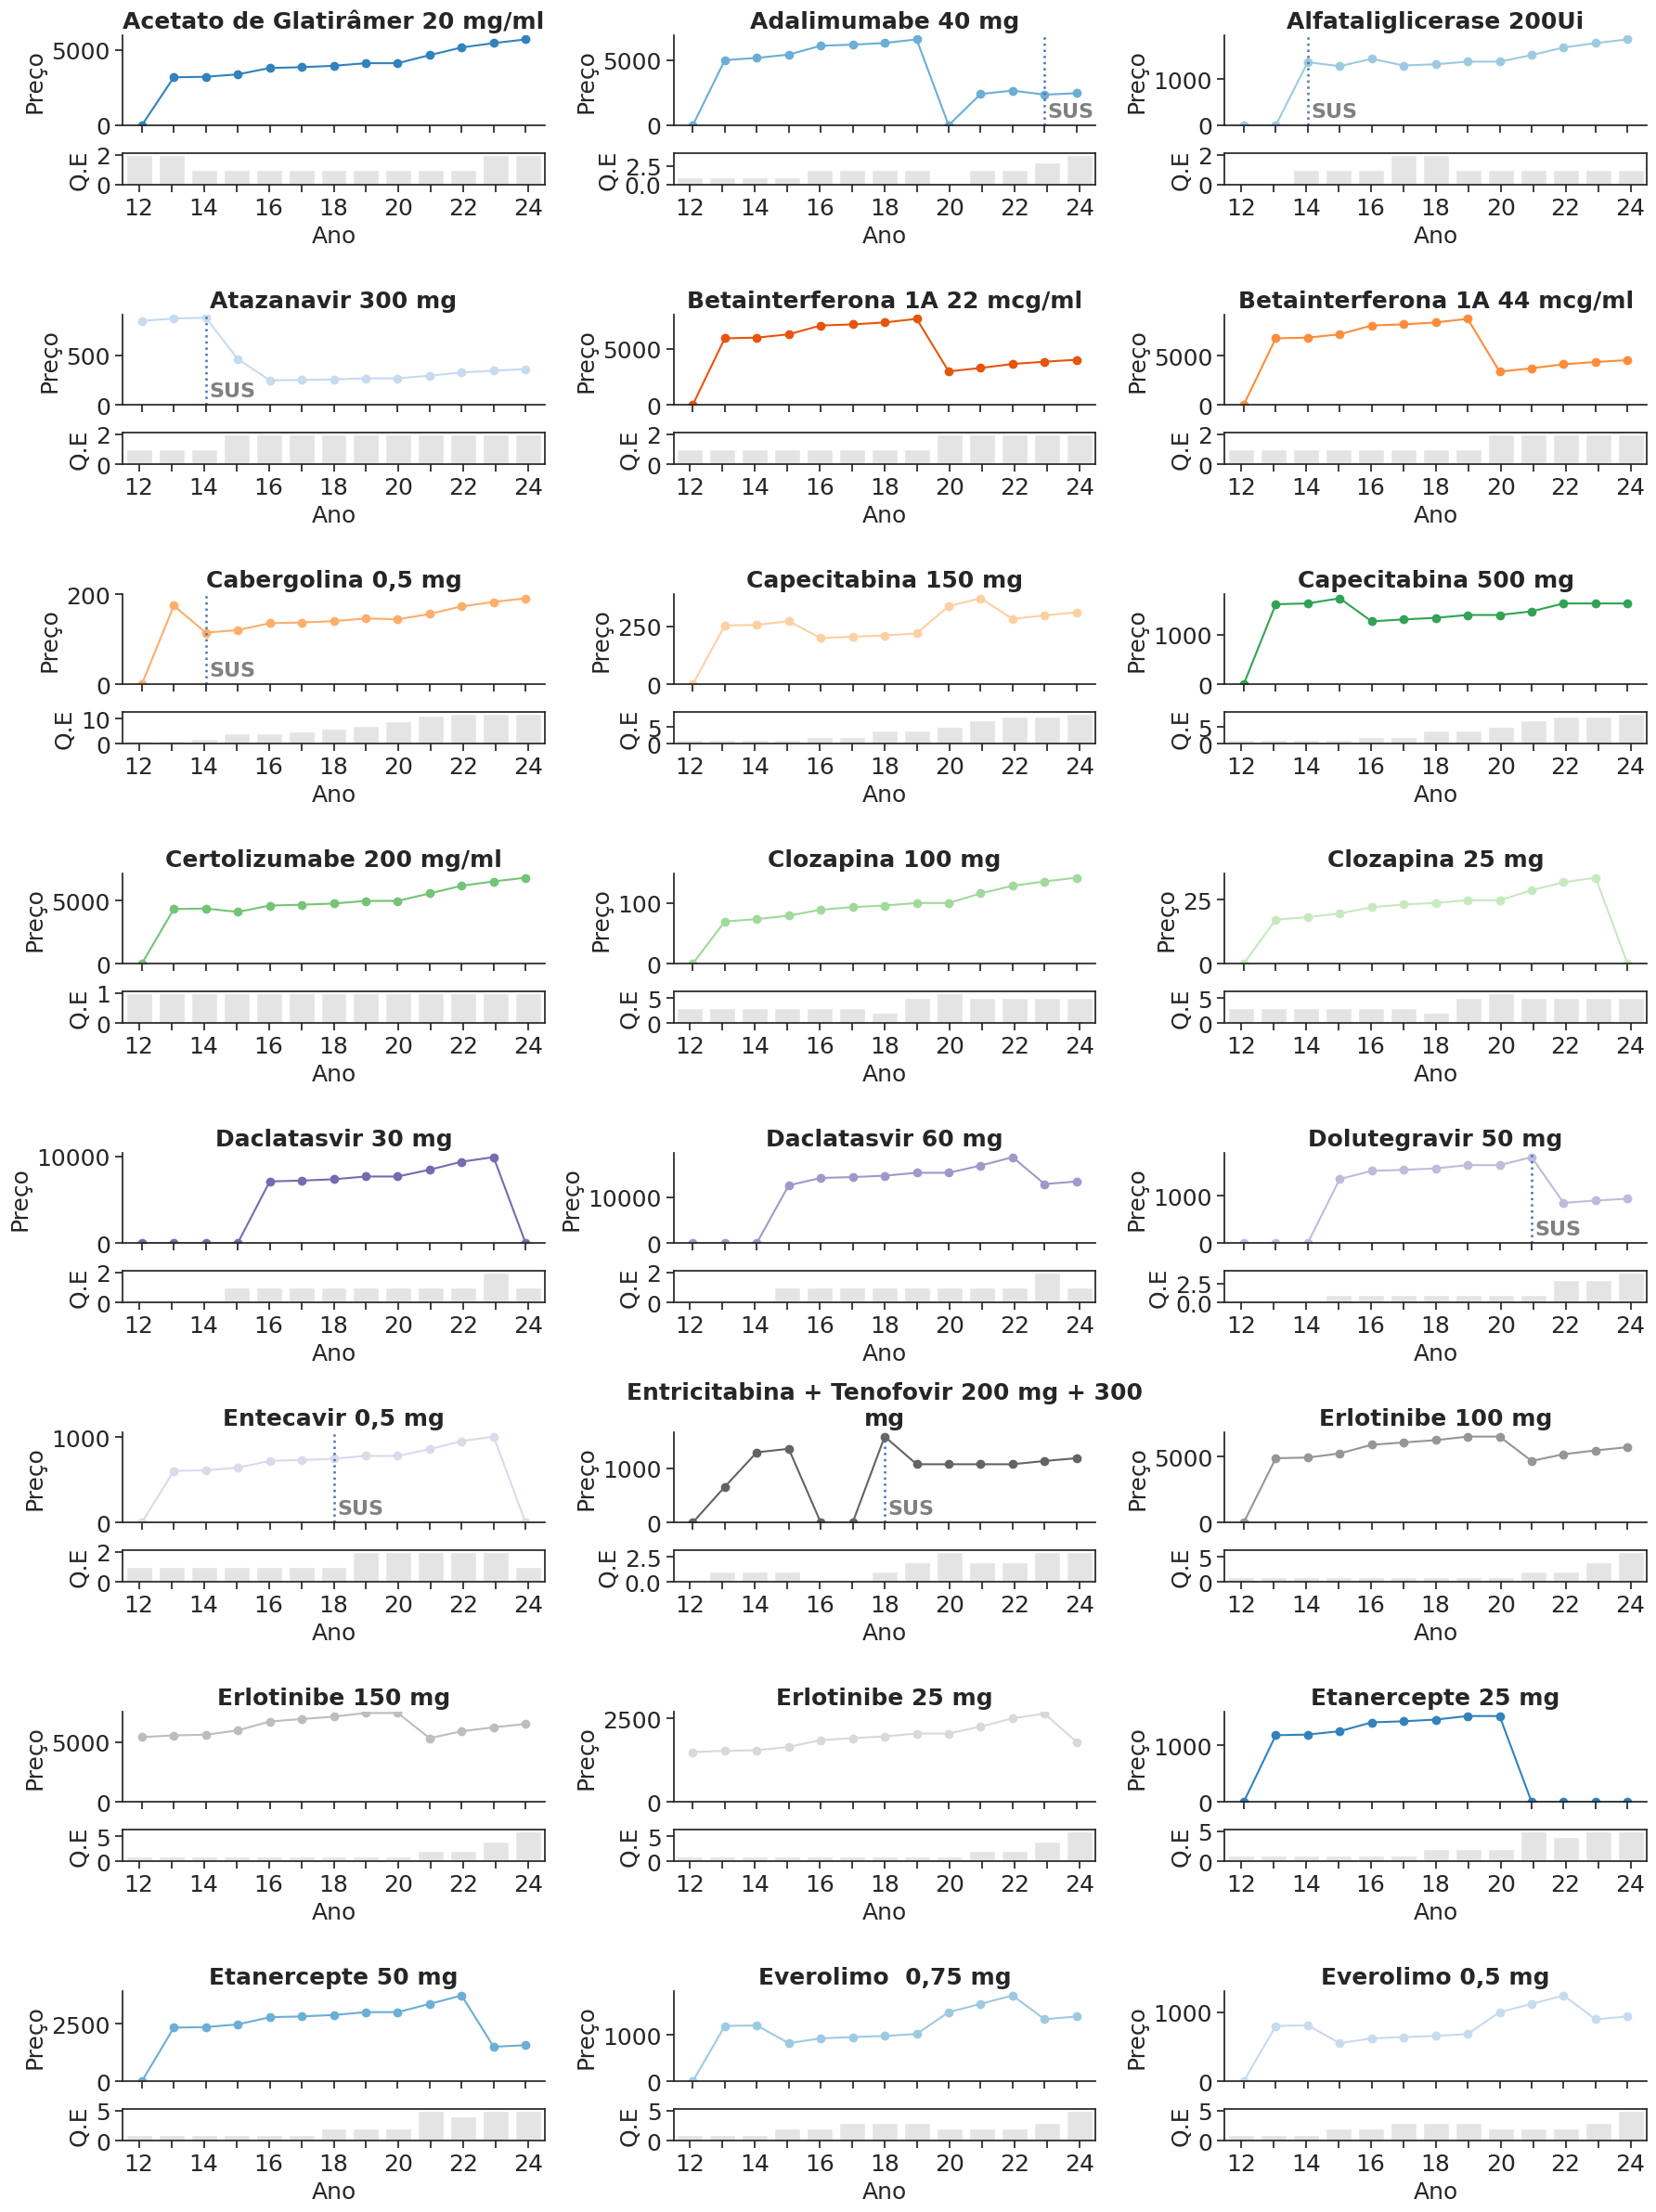

In [11]:
charts = FacetChart(
    df = df_consolidado[df_consolidado['Princípio ativo'].isin(princio_ativo[:24])],
    col="Princípio ativo",
    hue="Princípio ativo",
    font_config={'fontsize':18},
    palette="tab20c",
    col_wrap=3,
    height=3,
    sharey=False, 
    sharex=False, 
    aspect=2,
)

charts.subplots(save_file='amostra_3_por_coluna')


## scatterplot

<Figure size 800x500 with 0 Axes>

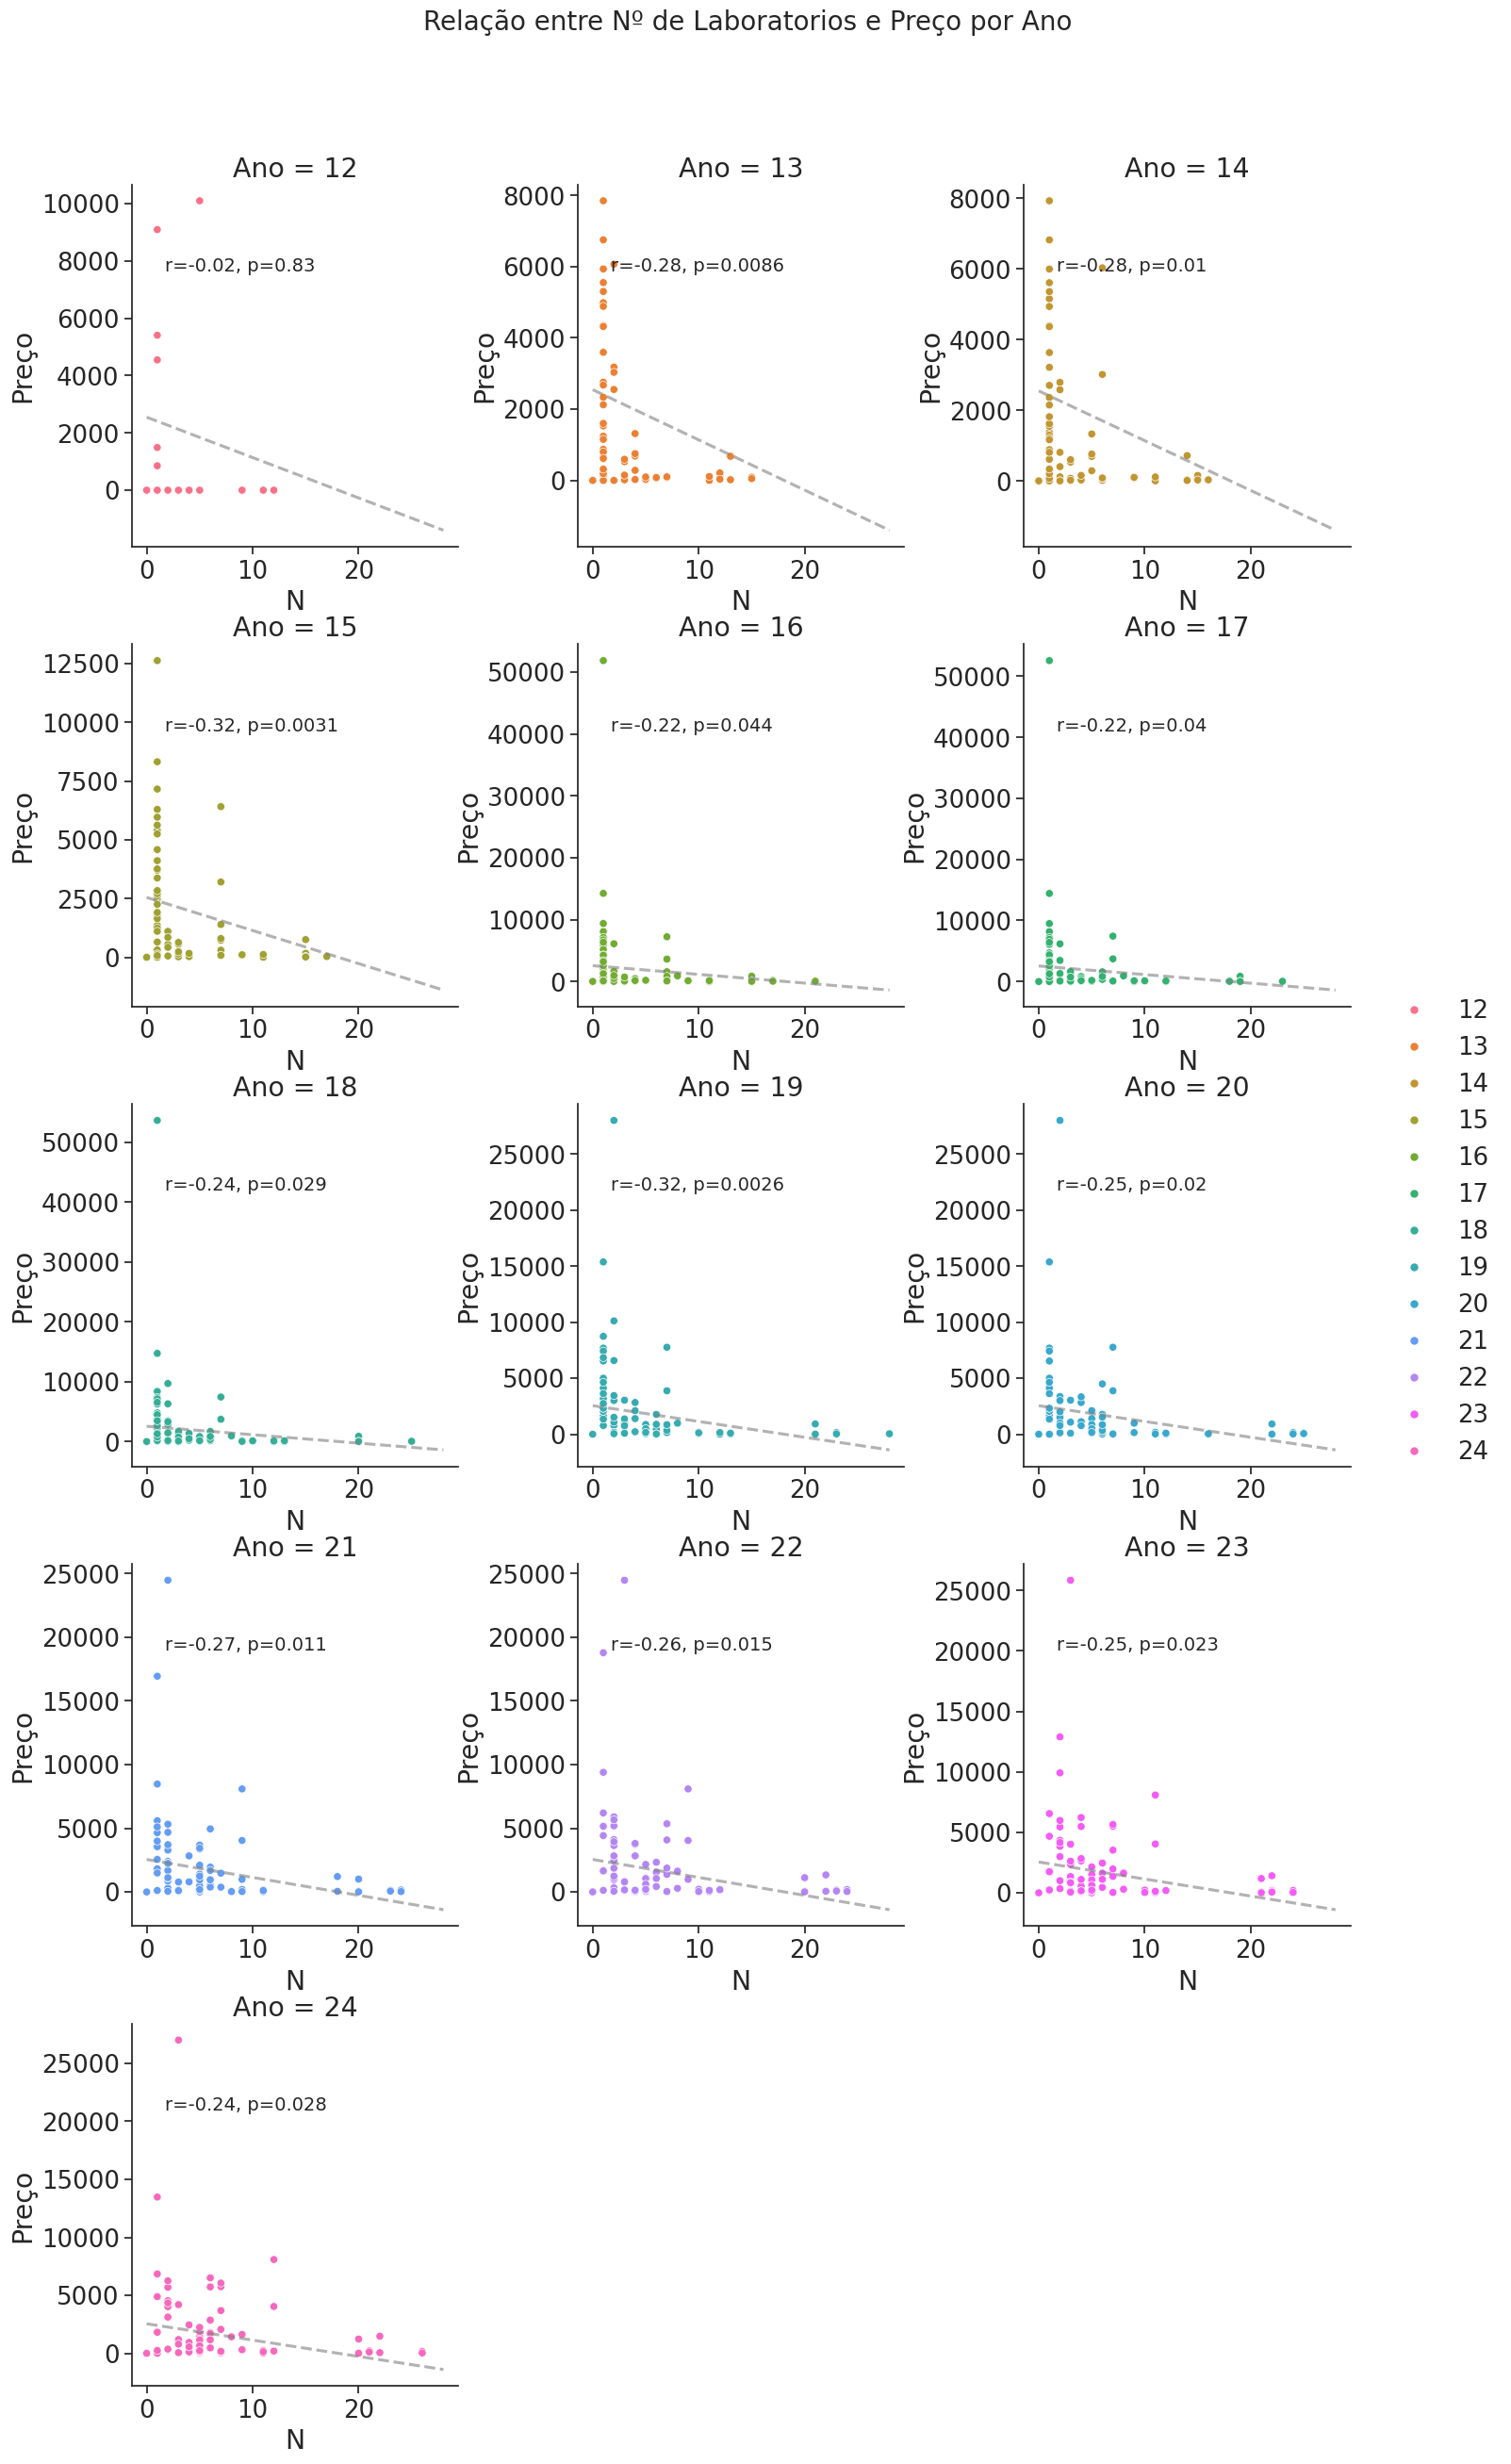

In [12]:
# Criar o gráfico de dispersão
import scipy as sp

sns.set_theme(style="ticks", font_scale=1.7)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['N'], data['Preço'])
    ax = plt.gca()
    ax.text(.1, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes, fontsize=14, verticalalignment="top",)

plt.figure(figsize=(8, 5))
grid = sns.relplot(data=df_consolidado, x="N", y="Preço", hue='Ano', col='Ano', col_wrap=3, facet_kws={'sharey':False, 'sharex':False} )

grid.map_dataframe(annotate)
# Adicionar linha de tendência em cada subplot
for ax in grid.axes.flat:
    sns.regplot(
        data=df_consolidado, 
        x="N", 
        y="Preço", 
        scatter=False,  # Oculta os pontos para evitar duplicação
        ax=ax, 
        color='grey',  # Cor da linha de tendência
        ci=None , # Remove a faixa de confiança,
        line_kws={'linestyle':'dashed', 'alpha':0.6}
    )

grid.figure.suptitle("Relação entre Nº de Laboratorios e Preço por Ano", fontsize=20, y=1.05)  
grid.legend.set_title("")

plt.show()

## Heatmap

<Axes: ylabel='Princípio ativo'>

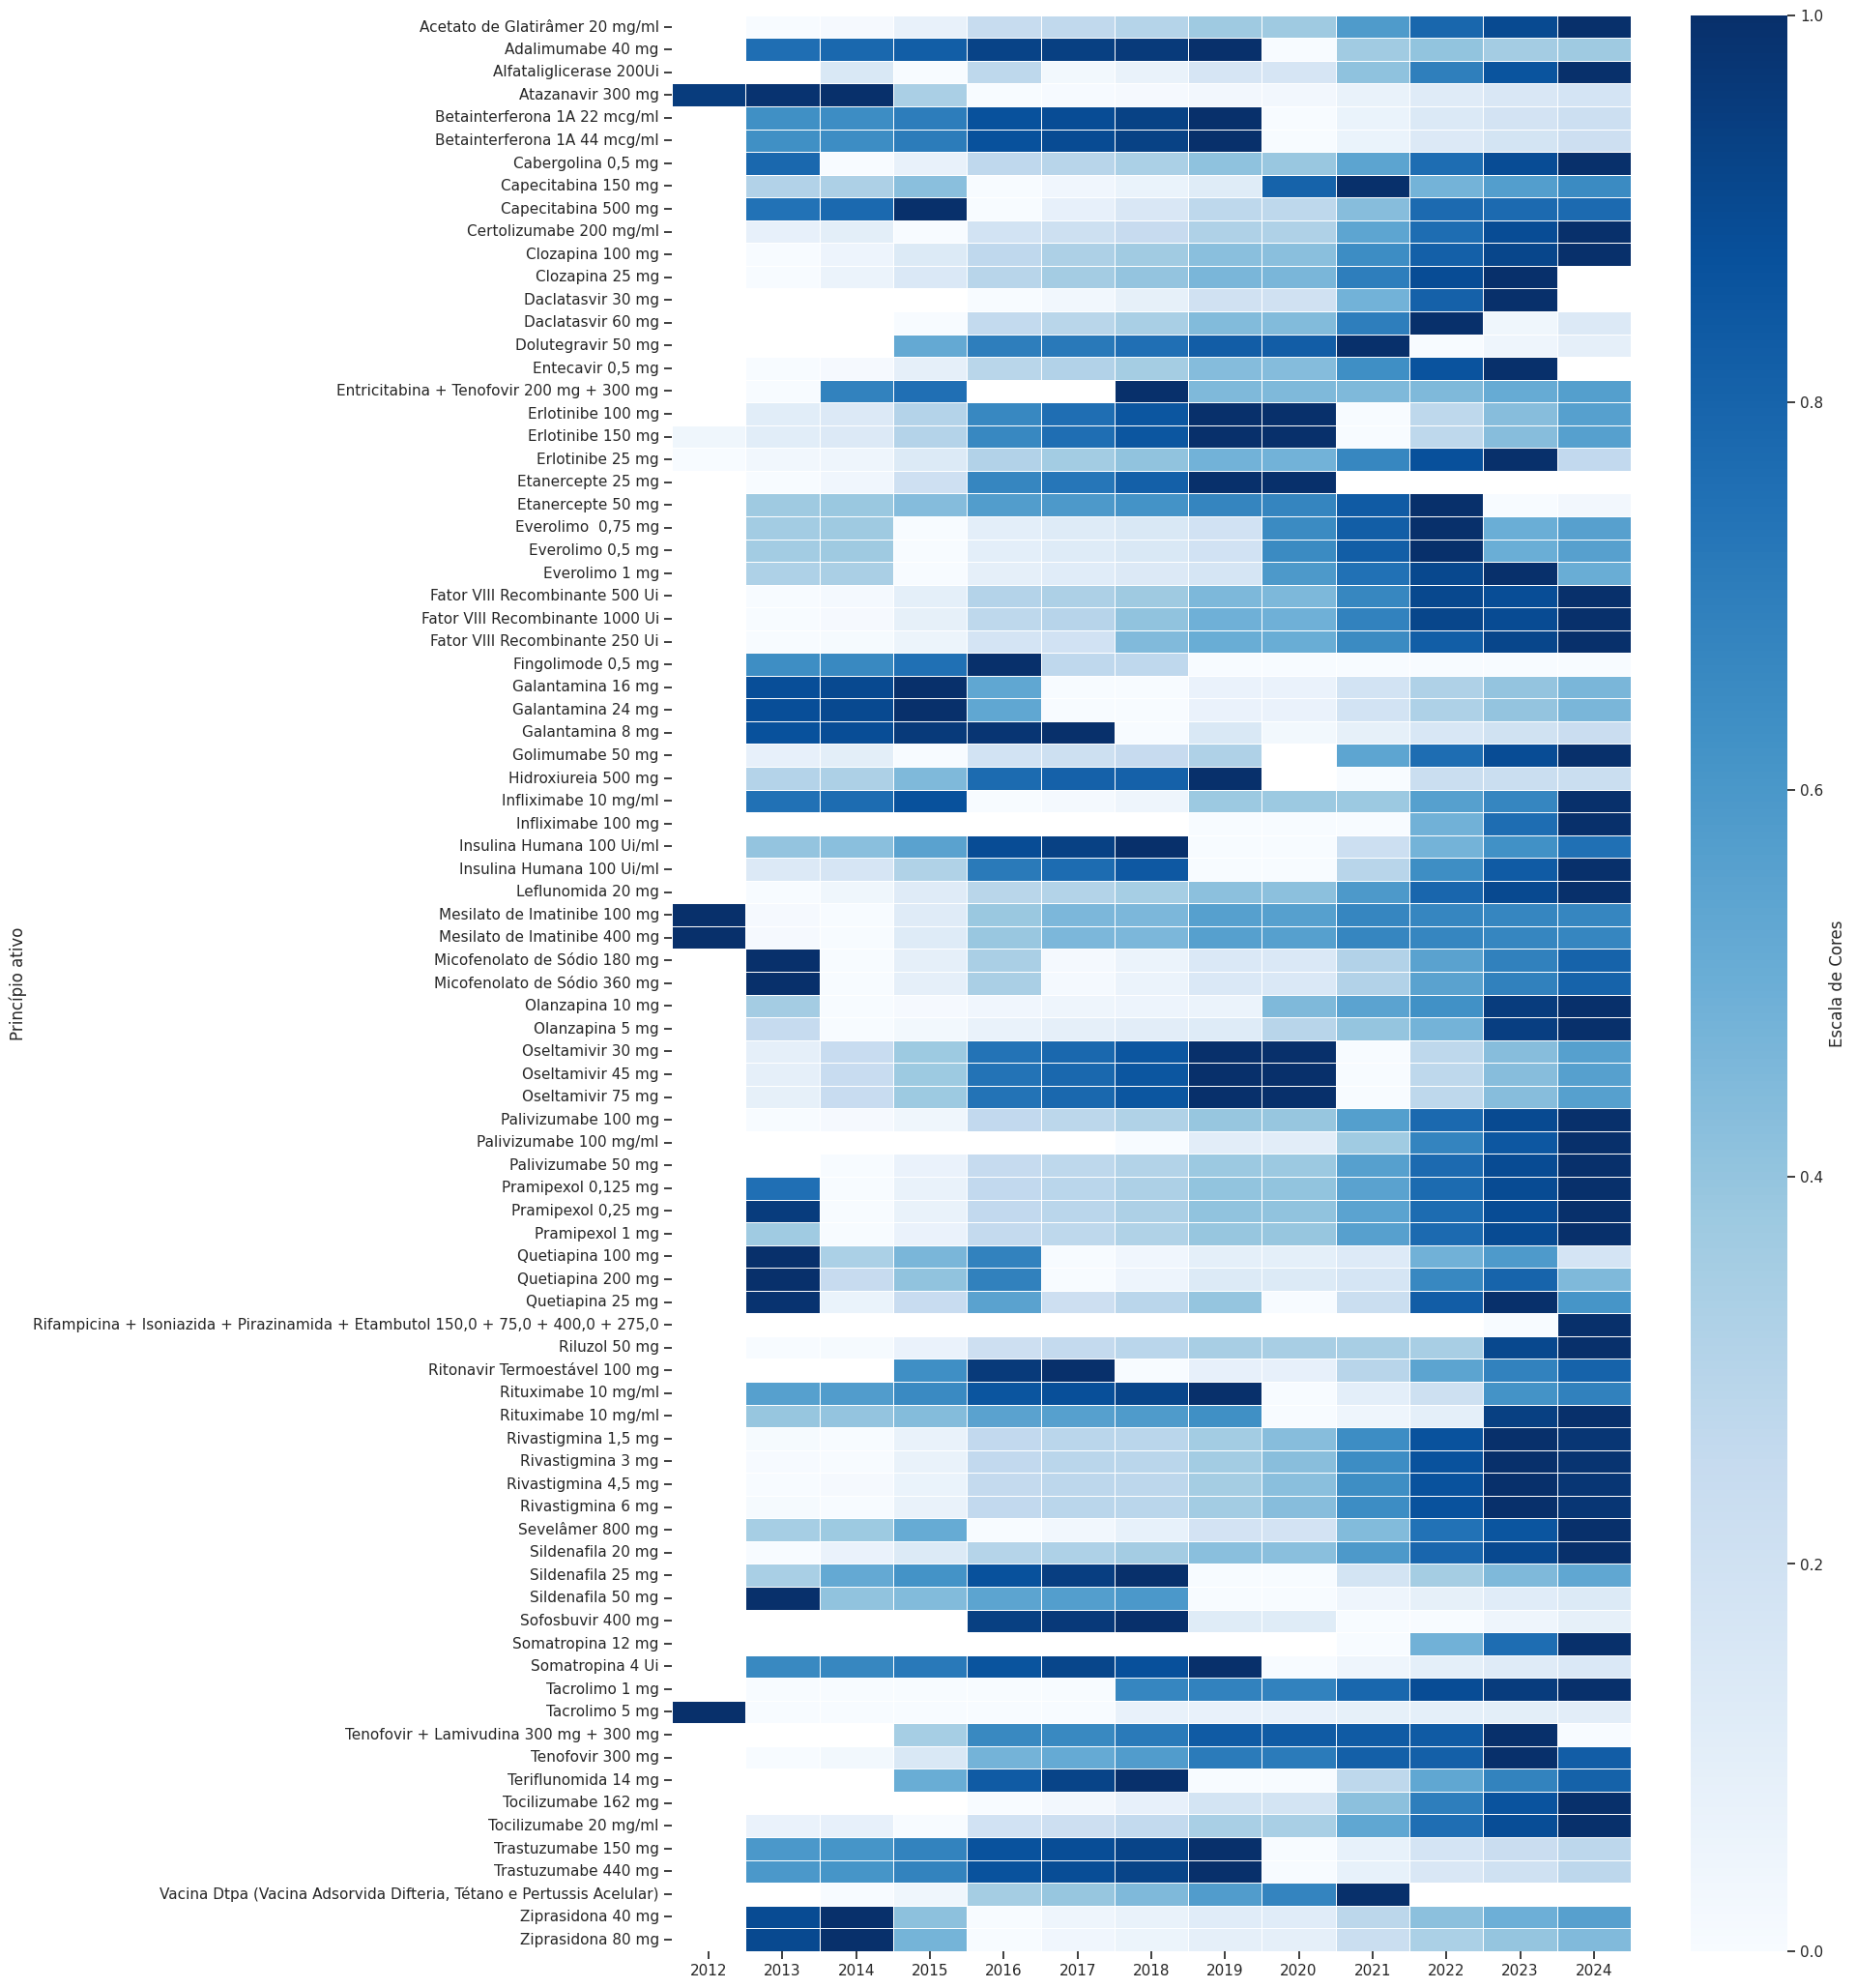

In [134]:


sns.set_theme(style="ticks", font_scale=1)

plt.figure(figsize=(16, 26)) 

# Normalizar os valores por linha (min-max scaling)
df_normalized = df_valor.set_index('Princípio ativo')
df_normalized = df_normalized.sub(df_normalized.min(axis=1), axis=0).div(df_normalized.max(axis=1) - df_normalized.min(axis=1), axis=0)


sns.heatmap(
    df_normalized,
    cmap="Blues",  # Esquema de cores
    linewidths=0.5,  # Linhas entre células
    annot_kws={"size": 12},  # Tamanho da fonte dos valores
    cbar_kws={'label': 'Escala de Cores'}  # Rótulo da barra de cores
    )

## Rede

In [94]:
df = pd.read_excel('data/fabio.xlsx', sheet_name='categoria_registro', na_values='-')
df.head()

,Produto,Data do registro,Categoria,Registro,Empresa,Princípio ativo
0,COPAXONE,2006-10-16,NOVO,155730001,TEVA FARMACÊUTICA LTDA.,ACETATO DE GLATIRÂMER
1,acetato de glatirâmer,2020-11-30,NOVO,155730056,TEVA FARMACÊUTICA LTDA.,ACETATO DE GLATIRÂMER
2,GLAMETIX,NaT,SIMILAR,156260032,LABORATÓRIOS BAGÓ DO BRASIL S/A,ACETATO DE GLATIRÂMER
3,acetato de glatirâmer,NaT,GENÉRICO,155730064,TEVA FARMACÊUTICA LTDA.,ACETATO DE GLATIRÂMER
4,AMGEVITA,2019-04-01,BIOLÓGICO,102440015,AMGEN BIOTECNOLOGIA DO BRASIL LTDA.,ADALIMUMABE


In [95]:
df_edges = df.groupby(['Empresa',	"Princípio ativo"]).size().reset_index(name='edge_weights')
df_edges

,Empresa,Princípio ativo,edge_weights
0,ABBVIE FARMACÊUTICA LTDA.,ADALIMUMABE,1
1,ABBVIE FARMACÊUTICA LTDA.,RITONAVIR,2
2,ACCORD FARMACÊUTICA LTDA,CLORIDRATO DE FINGOLIMODE,1
3,ACCORD FARMACÊUTICA LTDA,EVEROLIMO,2
4,ACCORD FARMACÊUTICA LTDA,HEMIFUMARATO DE QUETIAPINA,1
...,...,...,...
336,ZYDUS NIKKHO FARMACÊUTICA LTDA,CLORIDRATO DE ERLOTINIBE,1
337,ZYDUS NIKKHO FARMACÊUTICA LTDA,CLOZAPINA,1
338,ZYDUS NIKKHO FARMACÊUTICA LTDA,HEMIFUMARATO DE QUETIAPINA,1
339,ZYDUS NIKKHO FARMACÊUTICA LTDA,MESILATO DE IMATINIBE,1


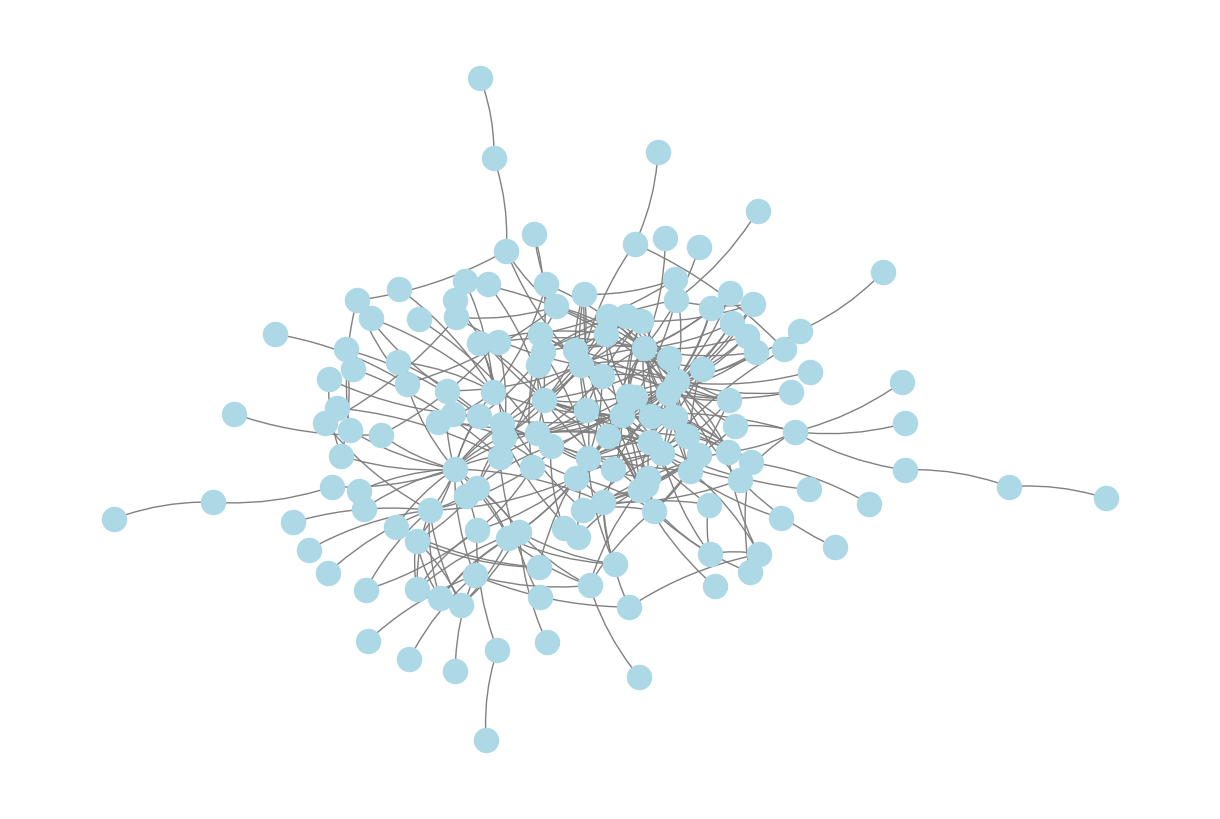

In [173]:
import networkx as nx

G=nx.from_pandas_edgelist(df_edges, 'Empresa', 'Princípio ativo', edge_attr=True)

plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G, scale=6)  # Layout forçado
# pos = nx.spring_layout(G)  # Layout forçado

nx.draw(G, pos, with_labels=False, node_color="lightblue", edge_color="gray", connectionstyle="arc3,rad=0.1", arrows=True)

/tmp/ipykernel_117665/2712161380.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajustar layout para evitar cortes


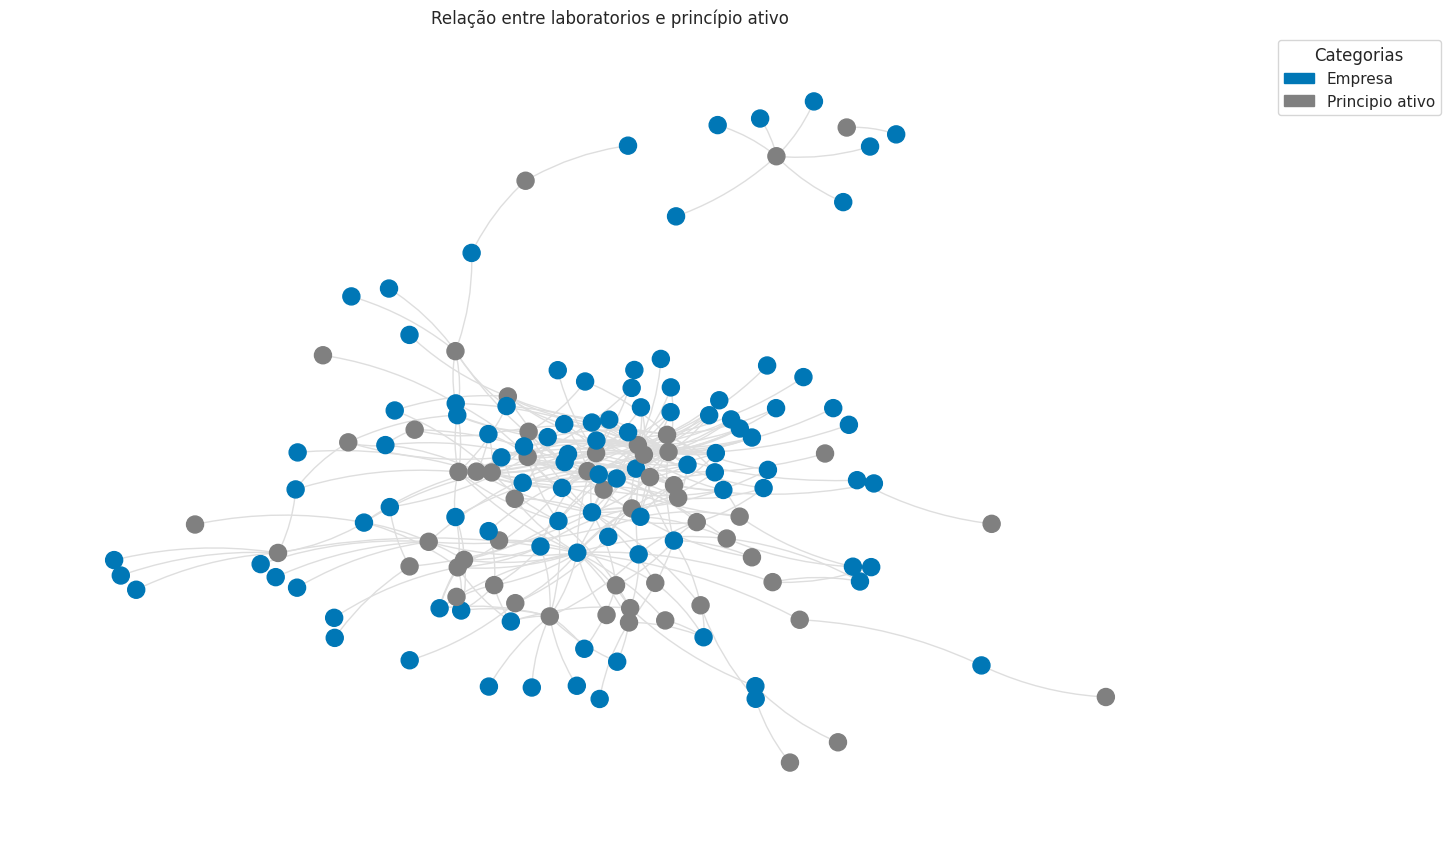

In [292]:
import networkx as nx

nodes_attr = {}
for i , value in df_edges.iterrows():
    nodes_attr.update({value.iloc[0]:'Empresa', value.iloc[1]:'Principio ativo'}, )
    


G=nx.from_pandas_edgelist(df_edges, 'Empresa', 'Princípio ativo', edge_attr=True)

nx.set_node_attributes(G, nodes_attr, name="tipo")

# Mapeamento de atributos para cores
mapeamento_cores = {
    "Empresa": "#0077b6",
    "Principio ativo": "#808080",
}

# Criar uma lista de cores para os nós com base no atributo
node_color = [mapeamento_cores[G.nodes[node]["tipo"]] for node in G.nodes()]

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G, k=0.15, iterations=50, seed=1)  # Layout forçado

nx.draw(G, pos, with_labels=False, node_color=node_color, edge_color="#dedede", connectionstyle="arc3,rad=0.1", arrows=True, node_size=150)

import matplotlib.patches as mpatches

# Criar patches para a legenda
patches = [
    mpatches.Patch(color=cor, label=categoria) for categoria, cor in mapeamento_cores.items()
]

# Adicionar legenda personalizada
plt.legend(handles=patches, title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o grafo
plt.title("Relação entre laboratorios e princípio ativo")
plt.axis("off")
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()
